## Correlation
### Pearson correlation coefficient
* $r$ measures a linear relationship between two quantitative variables
* $r$ only cares linear relationship. Check data first, if not linear, the result does not make sense
* scipy.stats.pearsonr(A, B)
* $r^2$ = fraction of the variability of one variable that can bepredicted by the other

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv('data/marscrater_pds.csv', low_memory=False)

num_layers=0, r=0.615, p=0.000000E+00


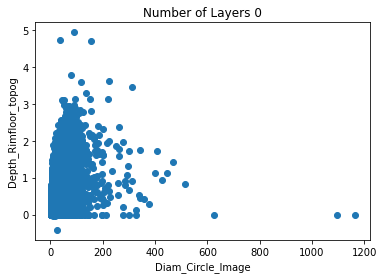

num_layers=3, r=0.772, p=2.235925E-147


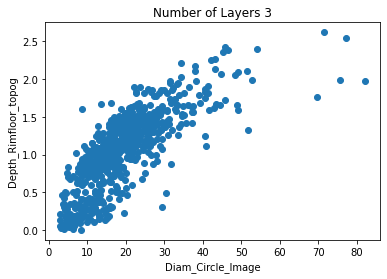

num_layers=2, r=0.795, p=0.000000E+00


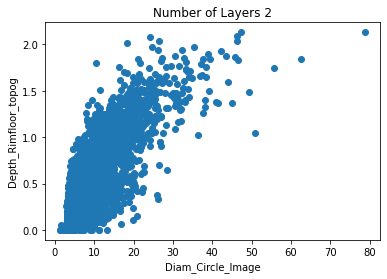

num_layers=1, r=0.627, p=0.000000E+00


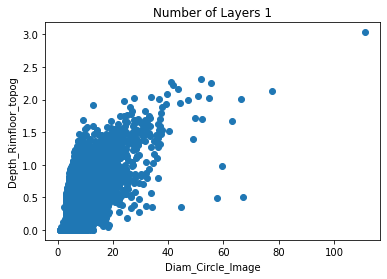

num_layers=4, r=0.750, p=1.523345E-16


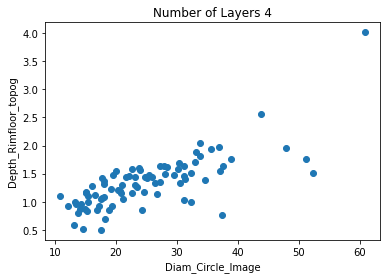

num_layers=5, r=0.812, p=9.506375E-02


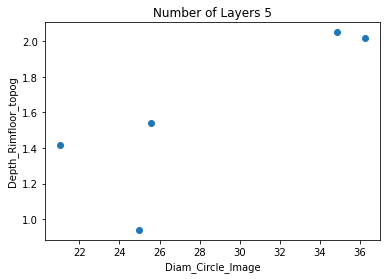

In [3]:
data['diam'] = pd.to_numeric(data.DIAM_CIRCLE_IMAGE)
data['depth'] = pd.to_numeric(data.DEPTH_RIMFLOOR_TOPOG)
data_new = data[['diam', 'depth', 'NUMBER_LAYERS']].copy()

for layer in data_new.NUMBER_LAYERS.unique():
    
    sub = data_new[data_new.NUMBER_LAYERS == layer]
    print("num_layers={}, r={:.3f}, p={:2E}".format(layer, *st.pearsonr(sub.diam, sub.depth)))
    plt.figure()
    plt.scatter(sub.diam, sub.depth)
    plt.title("Number of Layers {}".format(layer))
    plt.xlabel("Diam_Circle_Image")
    plt.ylabel("Depth_Rimfloor_topog")
    plt.show()

In [4]:
st.pearsonr(sub.diam, sub.depth)

(0.8119743297153132, 0.09506375467468617)

In this project, we will run Pearson correlation test on two quantitive variables and generate the correlation coefficient. We are using the “Marscrater_pds” dataset. A quick view of the dataset shows that there are two interesting columns with quantitive numbers: DIAM_CICLE_IMAGE, which is the measured diameter of the crater, and DEPTH_RIMFLOOR_TOPOG, which is the measured depth.

Although we can run correlations of these two quantities, we found that the results are confounded by the  “NUMBER_LAYER” column. To better understand the Pearson correlation, we regrouped the data according to the number of layers (0, 1, 2, 3, 4, 5). The correlation coefficients of each data are shown in the following figure. For example, for the case of num_layer=3, the r is 0.772 and p is 2.23E-147, which means correlation is statistically significant with coefficient of 0.772, and r2=0.6. That means a given diameter would explain 60% of the variation in the depth variable. On the other hand, for the case of num_layer=5, although the coefficient is 0.812, the p is 0.095, indicating the correlation is not significant.